In [1]:
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.display import display, HTML
from string import Template
HTML('<script src="./d3.min.js"></script>')

In [2]:
g = nx.karate_club_graph()

C:\Users\james\AppData\Local\Programs\Python\Python35-32\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


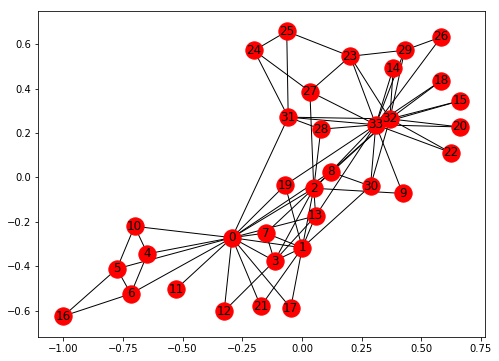

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6));
nx.draw_networkx(g, ax=ax)

In [3]:
def plot_graph(graph, 
               name_attribute = 'name', 
               colour_attribute = 'group',
               width = 1000, 
               height = 1000, 
               charge = -500,
               div_name = 'here',
               as_html= False,
               radius_attribute = 'size',
               link_distance = 100):
    # rename
    g = graph
    
    # sort out graph
    nodes = [{'name': str(i), 'club': g.node[i]['club']} for i in g.nodes()]
    links = [{'source': u[0], 'target': u[1]} for u in g.edges()]
    

    for node in nodes:
        if name_attribute not in node:
            node[name_attribute] = ''
        if colour_attribute not in node:
            node[colour_attribute] = 1
        if radius_attribute not in node:
            node[radius_attribute] = 10
            
            
    with open('graph.json', 'w') as f:
        json.dump({'nodes': nodes, 'links': links},
                  f, indent=4,)

    html_template = Template('''
        <div id="$here"></div>
        <style>
        .link {stroke: #999; stroke-opacity: .6;}
        </style>
        <script> $js_text </script>
        '''
        )

    # JS
    js_text_template = Template('''
                    // We load the d3.js library from the Web.

                      // The code in this block is executed when the
                      // d3.js library has been loaded.

                      // First, we specify the size of the canvas
                      // containing the visualization (size of the
                      // <div> element).
                      var width = $w, height = $h;

                      // We create a color scale.
                      var color = d3.scale.category10();

                      // We create a force-directed dynamic graph layout.
                      var force = d3.layout.force()
                        .charge($charge)
                        .linkDistance($link_distance)
                        .size([width, height]);

                      // In the <div> element, we create a <svg> graphic
                      // that will contain our interactive visualization.
                      var svg = d3.select("#$here").select("svg")
                      if (svg.empty()) {
                        svg = d3.select("#$here").append("svg")
                              .attr("width", width)
                              .attr("height", height);
                      }

                      // We load the JSON file.
                      d3.json("graph.json", function(error, graph) {
                        // In this block, the file has been loaded
                        // and the 'graph' object contains our graph.

                        // We load the nodes and links in the
                        // force-directed graph.
                        force.nodes(graph.nodes)
                          .links(graph.links)
                          .start();

                        // We create a <line> SVG element for each link
                        // in the graph.
                        var link = svg.selectAll(".link")
                          .data(graph.links)
                          .enter().append("line")
                          .attr("class", "link");

                        // We create a <circle> SVG element for each node
                        // in the graph, and we specify a few attributes.
                        var node = svg.selectAll(".node")
                          .data(graph.nodes)
                          .enter().append("g")
                          .attr("class", "node")
                          .call(force.drag);
                    
                      node.append("circle")
                          .attr("r", function(d) {return d.$radius_attribute; })  // radius
                          .style("fill", function(d) {
                             // The node color depends on the club.
                             return color(d.$col);
                          });

                      node.append("text")
                          .attr("dx", 12)
                          .attr("dy", ".35em")
                          .text(function(d) { return d.$name });


                        // The name of each node is the node number.
                        node.append("title")
                            .text(function(d) { return d.$name; });

                        // We bind the positions of the SVG elements
                        // to the positions of the dynamic force-directed
                        // graph, at each time step.
                        force.on("tick", function() {
                        link.attr("x1", function(d) { return d.source.x; })
                            .attr("y1", function(d) { return d.source.y; })
                            .attr("x2", function(d) { return d.target.x; })
                            .attr("y2", function(d) { return d.target.y; });

                        node.attr("transform", function(d) { return "translate(" + d.x + "," + d.y + ")"; });
                      });
                      });


                    ''')
    
    js_text = js_text_template.substitute({'here': div_name,
                                          'h': height,
                                          'w': width,
                                          'col': colour_attribute,
                                          'name': name_attribute,
                                          'charge': charge,
                                          'link_distance': link_distance,
                                          'radius_attribute': radius_attribute})
    
    
    
    html = html_template.substitute({'js_text': js_text, 'here': div_name})
    
    if not as_html:
       # HTML('<script src="./d3.min.js"></script>')
        return HTML(html)
    else:
        return html

In [4]:
plot_graph(g)

In [18]:
html_template = Template('''
<div id="d3-example"></div>
<style>
.link {stroke: #999; stroke-opacity: .6;}
</style>
<script> $js_text </script>
'''
)

In [17]:
js_text_template = Template('''
// We load the d3.js library from the Web.

  // The code in this block is executed when the
  // d3.js library has been loaded.

  // First, we specify the size of the canvas
  // containing the visualization (size of the
  // <div> element).
  var width =1000, height = 1000;

  // We create a color scale.
  var color = d3.scale.category10();

  // We create a force-directed dynamic graph layout.
  var force = d3.layout.force()
    .charge(-500)
    .linkDistance(100)
    .size([width, height]);

  // In the <div> element, we create a <svg> graphic
  // that will contain our interactive visualization.
  var svg = d3.select("#$here").select("svg")
  if (svg.empty()) {
    svg = d3.select("#$here").append("svg")
          .attr("width", width)
          .attr("height", height);
  }

  // We load the JSON file.
  d3.json("graph.json", function(error, graph) {
    // In this block, the file has been loaded
    // and the 'graph' object contains our graph.

    // We load the nodes and links in the
    // force-directed graph.
    force.nodes(graph.nodes)
      .links(graph.links)
      .start();

    // We create a <line> SVG element for each link
    // in the graph.
    var link = svg.selectAll(".link")
      .data(graph.links)
      .enter().append("line")
      .attr("class", "link");

    // We create a <circle> SVG element for each node
    // in the graph, and we specify a few attributes.
    var node = svg.selectAll(".node")
      .data(graph.nodes)
      .enter().append("g")
      .attr("class", "node")
      .call(force.drag);

  node.append("image")
      .attr("xlink:href", "https://github.com/favicon.ico")
      .attr("x", -8)
      .attr("y", -8)
      .attr("width", 16)
      .attr("height", 16);

  node.append("text")
      .attr("dx", 12)
      .attr("dy", ".35em")
      .text(function(d) { return d.name });
      
      
    // The name of each node is the node number.
    node.append("title")
        .text(function(d) { return d.name; });

    // We bind the positions of the SVG elements
    // to the positions of the dynamic force-directed
    // graph, at each time step.
    force.on("tick", function() {
    link.attr("x1", function(d) { return d.source.x; })
        .attr("y1", function(d) { return d.source.y; })
        .attr("x2", function(d) { return d.target.x; })
        .attr("y2", function(d) { return d.target.y; });

    node.attr("transform", function(d) { return "translate(" + d.x + "," + d.y + ")"; });
  });
  });


''')

In [19]:
js_text = js_text_template.substitute({'here': 'd3-example'})
HTML('<script src="./d3.min.js"></script>')
HTML(html_template.substitute({'js_text': js_text}))

In [16]:
print(html_template.substitute({'js_text': js_text}))


<div id="d3-example"></div>
<style>
.link {stroke: #999; stroke-opacity: .6;}
</style>
<script> 
// We load the d3.js library from the Web.

  // The code in this block is executed when the
  // d3.js library has been loaded.

  // First, we specify the size of the canvas
  // containing the visualization (size of the
  // <div> element).
  var width =1000, height = 1000;

  // We create a color scale.
  var color = d3.scale.category10();

  // We create a force-directed dynamic graph layout.
  var force = d3.layout.force()
    .charge(-500)
    .linkDistance(100)
    .size([width, height]);

  // In the <div> element, we create a <svg> graphic
  // that will contain our interactive visualization.
  var svg = d3.select("#d3-example").select("svg")
  if (svg.empty()) {
    svg = d3.select("#d3-example").append("svg")
          .attr("width", width)
          .attr("height", height);
  }

  // We load the JSON file.
  d3.json("graph.json", function(error, graph) {
    // In this block, 

In [7]:
js_text_template = Template('''
// We load the d3.js library from the Web.

  // The code in this block is executed when the
  // d3.js library has been loaded.

  // First, we specify the size of the canvas
  // containing the visualization (size of the
  // <div> element).
  var width =1000, height = 1000;

  // We create a color scale.
  var color = d3.scale.category10();

  // We create a force-directed dynamic graph layout.
  var force = d3.layout.force()
    .charge(-500)
    .linkDistance(100)
    .size([width, height]);

  // In the <div> element, we create a <svg> graphic
  // that will contain our interactive visualization.
  var svg = d3.select("#$here").select("svg")
  if (svg.empty()) {
    svg = d3.select("#$here").append("svg")
          .attr("width", width)
          .attr("height", height);
  }

  // We load the JSON file.
  d3.json("graph.json", function(error, graph) {
    // In this block, the file has been loaded
    // and the 'graph' object contains our graph.

    // We load the nodes and links in the
    // force-directed graph.
    force.nodes(graph.nodes)
      .links(graph.links)
      .start();

    // We create a <line> SVG element for each link
    // in the graph.
    var link = svg.selectAll(".link")
      .data(graph.links)
      .enter().append("line")
      .attr("class", "link");

    // We create a <circle> SVG element for each node
    // in the graph, and we specify a few attributes.
    var node = svg.selectAll(".node")
      .data(graph.nodes)
      .enter()
      .append("g")
      .attr("class", "node")
      .call(force.drag);
      
      node.append("circle")
      .attr("r", 5)  // radius
      .style("fill", function(d) {
         // The node color depends on the club.
         return color(d.club);
      });
      
    
    node.append("text")
      .attr("dx", 12)
      .attr("dy", ".35em")
      .text(function(d) { return d.name });
      
      
    // The name of each node is the node number.
    node.append("title")
        .text(function(d) { return d.name; });

    // We bind the positions of the SVG elements
    // to the positions of the dynamic force-directed
    // graph, at each time step.
    force.on("tick", function() {
      link.attr("x1", function(d){return d.source.x})
          .attr("y1", function(d){return d.source.y})
          .attr("x2", function(d){return d.target.x})
          .attr("y2", function(d){return d.target.y});

      node.attr("cx", function(d){return d.x})
          .attr("cy", function(d){return d.y});
    });
  });


''')